In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [ ]:
CreditTrain = pd.read_csv("/content/CreditScore_train.csv")
CreditTest = pd.read_csv("/content/CreditScore_test.csv")
Credit_df = pd.concat((CreditTrain,CreditTest),axis=0)
Credit_df

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1341378,51.0,3.0,18.0,120.0,0,1,3,0,1,...,23132,0.9084,1,1,1,0,NaN,0,NaN,541
19996,1290822,187.0,13.0,107.0,415.0,0,0,1,1,0,...,19269,0.8273,1,1,1,0,NaN,0,NaN,831
19997,795243,95.0,19.0,57.0,95.0,1,0,2,2,2,...,0,NaN,1,1,1,0,5.0,30770,1.2299,543
19998,1323781,NaN,NaN,NaN,40.0,0,0,0,0,5,...,0,NaN,1,1,1,0,NaN,0,NaN,488


In [ ]:
print(Credit_df.shape)
Credit_null = Credit_df.isnull().sum() / len(Credit_df) * 100
Credit_null_df = pd.DataFrame({"columns":Credit_df.columns,"Percentage": Credit_null})
Credit_null_df = Credit_null_df[(Credit_null_df['Percentage'] > 0) & (Credit_null_df['Percentage'] <=10)]
#Credit_df.drop(Credit_null_df['columns'],axis=1,inplace=True)
#Credit_df.shape
Credit_null_df

(100000, 305)


,columns,Percentage
x005,x005,6.110
x272,x272,7.189


,x005,x272
count,93890.000000,92811.000000
mean,178.238545,0.587940
std,124.520628,5.392342
min,0.000000,0.000000
25%,87.000000,0.076400
50%,150.000000,0.287300
75%,246.000000,0.571100
max,827.000000,608.100000


<ipython-input-8-7606c502b218>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Credit_pre1[col],bins=15)


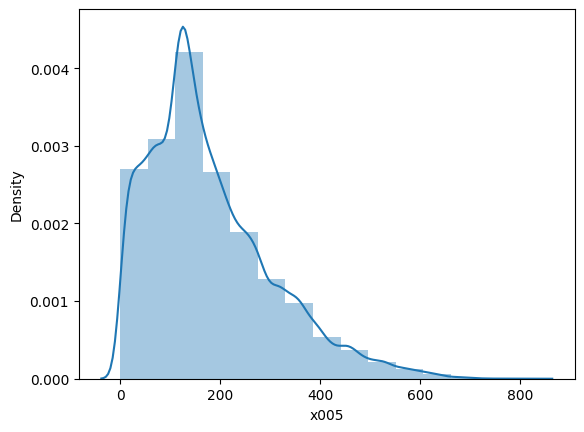

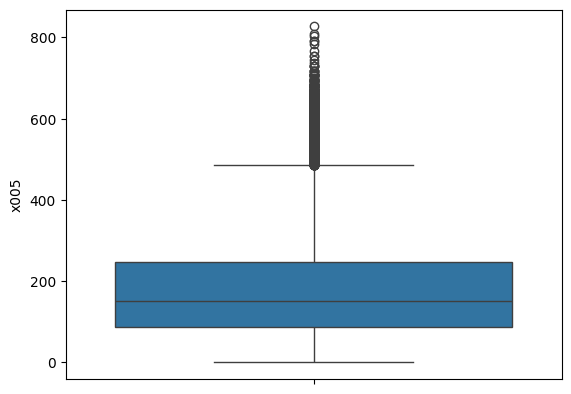

25th Quartile: 88.0
75th Quartile: 247.0
IQR: 159.0
Upper Outlier: 485.5
Lower Outlier: -150.5


,x005,x272
count,90386.000000,90386.000000
mean,169.088675,0.599314
std,109.786276,5.463590
min,0.000000,0.000000
25%,86.000000,0.081400
50%,147.000000,0.294000
75%,237.000000,0.581300
max,485.000000,608.100000


<ipython-input-8-7606c502b218>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Credit_pre1[col],bins=10)


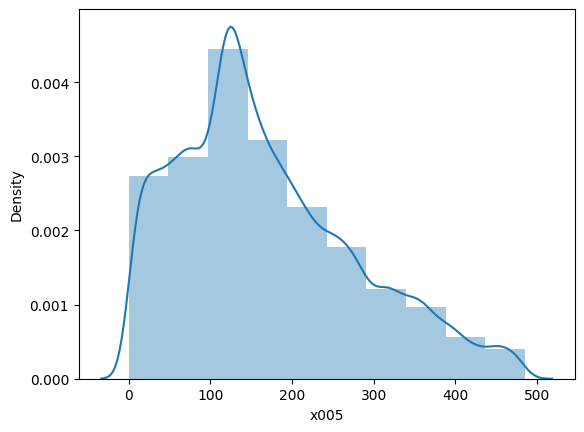

<ipython-input-8-7606c502b218>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit_pre[col].fillna(Credit_pre[col].mean(), inplace=True)


x005       0
x272    7189
dtype: int64

,x005,x272
count,100000.000000,92811.000000
mean,178.238545,0.587940
std,120.656530,5.392342
min,0.000000,0.000000
25%,94.000000,0.076400
50%,159.000000,0.287300
75%,237.000000,0.571100
max,827.000000,608.100000


<ipython-input-8-7606c502b218>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Credit_pre1[col],bins=15)


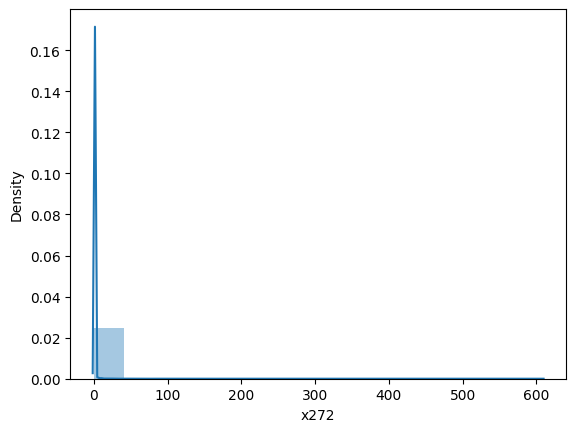

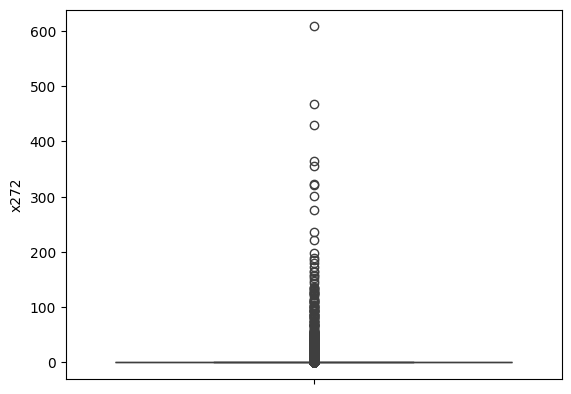

25th Quartile: 0.0814
75th Quartile: 0.5813
IQR: 0.4999
Upper Outlier: 1.33115
Lower Outlier: -0.66845


,x005,x272
count,88423.000000,88423.000000
mean,170.711704,0.357628
std,109.805451,0.318823
min,0.000000,0.000000
25%,88.000000,0.076900
50%,149.000000,0.284800
75%,239.000000,0.552400
max,485.000000,1.330800


<ipython-input-8-7606c502b218>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Credit_pre1[col],bins=10)


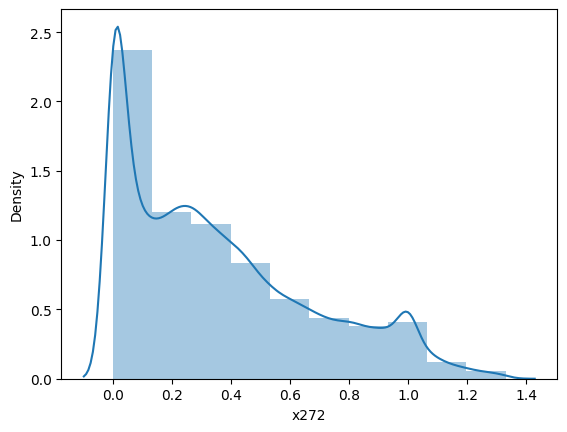

<ipython-input-8-7606c502b218>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit_pre[col].fillna(Credit_pre[col].mean(), inplace=True)


x005    0
x272    0
dtype: int64

,x005,x272
count,100000.000000,100000.000000
mean,178.238545,0.587940
std,120.656530,5.194897
min,0.000000,0.000000
25%,94.000000,0.092500
50%,159.000000,0.321400
75%,237.000000,0.587940
max,827.000000,608.100000


In [ ]:
#Less than 10% of missing values
Credit_pre = Credit_df[['x005','x272']]
display(Credit_pre.describe())
#Credit_pre = Credit_pre[Credit_pre.isnull().any(axis=1)]
Credit_pre1 = Credit_pre.copy()
for col in Credit_pre1.columns:
    Credit_pre1.dropna(inplace=True)
    ax = sns.distplot(Credit_pre1[col],bins=15)
    plt.show(ax)
    ax1 = sns.boxplot(Credit_pre1[col])
    plt.show(ax1)
    q25,q75 = np.percentile(Credit_pre1[col],25),np.percentile(Credit_pre1[col],75)
    IQR = q75 - q25
    print("25th Quartile:",q25)
    print("75th Quartile:",q75)
    print("IQR:",IQR)
    upper, lower = (q75 + (1.5 *IQR)), (q25 - (1.5 * IQR))
    print("Upper Outlier:",upper)
    print("Lower Outlier:", lower)
    Credit_pre1 = Credit_pre1[(Credit_pre1[col] > lower) & (Credit_pre1[col] < upper)]
    display(Credit_pre1.describe())
    ax = sns.distplot(Credit_pre1[col],bins=10)
    plt.show(ax)
    Credit_pre[col].fillna(Credit_pre[col].mean(), inplace=True)
    display(Credit_pre.isnull().sum())
    display(Credit_pre.describe())